In [1]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
import pandas as pd

In [2]:
#data pull
raw_creditg = fetch_openml(name="credit-g")
raw_trans = fetch_openml(name="blood-transfusion-service-center") 
raw_steel= fetch_openml(name="steel-plates-fault")
raw_diabetes= fetch_openml(name="diabetes")

d:\aml\venv\lib\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(
d:\aml\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
d:\aml\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the 

In [3]:
df_creditg = pd.DataFrame(raw_creditg.data, columns=raw_creditg.feature_names)
df_creditg_y = pd.DataFrame(raw_creditg.target, columns=raw_creditg.target_names)

df_trans = pd.DataFrame(raw_trans.data, columns=raw_trans.feature_names)
df_trans_y = pd.DataFrame(raw_trans.target, columns=raw_trans.target_names)

df_steel = pd.DataFrame(raw_steel.data, columns=raw_steel.feature_names)
df_steel_y = pd.DataFrame(raw_steel.target, columns=raw_steel.target_names)

df_diabetes = pd.DataFrame(raw_diabetes.data, columns=raw_diabetes.feature_names)
df_diabetes_y = pd.DataFrame(raw_diabetes.target, columns=raw_diabetes.target_names)

df_trans_y, df_steel_y, df_diabetes_y, df_creditg_y

(    Class
 0       2
 1       2
 2       2
 3       2
 4       1
 ..    ...
 743     1
 744     1
 745     1
 746     1
 747     1
 
 [748 rows x 1 columns],
      Class
 0        1
 1        1
 2        1
 3        1
 4        1
 ...    ...
 1936     2
 1937     2
 1938     2
 1939     2
 1940     2
 
 [1941 rows x 1 columns],
                class
 0    tested_positive
 1    tested_negative
 2    tested_positive
 3    tested_negative
 4    tested_positive
 ..               ...
 763  tested_negative
 764  tested_negative
 765  tested_negative
 766  tested_positive
 767  tested_negative
 
 [768 rows x 1 columns],
     class
 0    good
 1     bad
 2    good
 3    good
 4     bad
 ..    ...
 995  good
 996  good
 997  good
 998   bad
 999  good
 
 [1000 rows x 1 columns])

In [4]:
X_train_creditg, X_test_creditg, y_train_creditg, y_test_creditg = train_test_split(df_creditg, df_creditg_y, test_size=0.2, stratify=df_creditg_y)
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(df_trans, df_trans_y, test_size=0.2, stratify=df_trans_y)
X_train_steel, X_test_steel, y_train_steel, y_test_steel = train_test_split(df_steel, df_steel_y, test_size=0.2, stratify=df_steel_y)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(df_diabetes, df_diabetes_y, test_size=0.2, stratify=df_diabetes_y)

X_train_creditg, X_train_diabetes, X_train_steel, X_train_trans

(    checking_status  duration                  credit_history   purpose  \
 272        0<=X<200      48.0                        all paid   new car   
 523     no checking      24.0                   existing paid  used car   
 890              <0      27.0  critical/other existing credit  business   
 232     no checking      12.0                   existing paid  radio/tv   
 370     no checking      36.0                   existing paid   new car   
 ..              ...       ...                             ...       ...   
 591        0<=X<200      24.0              delayed previously   new car   
 732        0<=X<200       8.0                   existing paid  radio/tv   
 139           >=200      12.0                   existing paid  radio/tv   
 546     no checking      24.0  critical/other existing credit   new car   
 239              <0      30.0                   existing paid  radio/tv   
 
      credit_amount    savings_status  employment  installment_commitment  \
 272     

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
    ])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [6]:
#creditg
numeric_features_creditg = [
    "duration",
    "credit_amount",
    "installment_commitment",
    "residence_since",
    "age",
    "existing_credits",
    "num_dependents"
]
categorical_features_creditg = [
    "checking_status",
    "credit_history",
    "purpose",
    "savings_status",
    "employment",
    "personal_status",
    "other_parties",
    "property_magnitude",
    "other_payment_plans",
    "housing",
    "job",
    "own_telephone",
    "foreign_worker"
]

In [7]:
#df_diabetes
numeric_features_diabetes = [
    "preg",
    "plas",
    "pres",
    "skin",
    "insu",
    "mass",
    "pedi",
    "age"
]

In [8]:
#df_steel
numeric_features_steel = [
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V6",
    "V7",
    "V8",
    "V9",
    "V10",
    "V11",
    "V12",
    "V13",
    "V14",
    "V15",
    "V16",
    "V17",
    "V18",
    "V19",
    "V20",
    "V21",
    "V22",
    "V23",
    "V24",
    "V25",
    "V26",
    "V27",
    "V28",
    "V29",
    "V30",
    "V31",
    "V32",
    "V33"
]

In [9]:
#df_trans
numeric_features_trans = ["V1", "V2", "V3", "V4"]

In [10]:
from sklearn.compose import ColumnTransformer

col_trans_creditg = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline, numeric_features_creditg),
    ('cat_pipeline',cat_pipeline, categorical_features_creditg)
    ],
    remainder='drop',
    n_jobs=-1)

col_trans_diabetes = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,numeric_features_diabetes),
    ],
    remainder='drop',
    n_jobs=-1)

col_trans_steel = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline, numeric_features_steel),
    ],
    remainder='drop',
    n_jobs=-1)

col_trans_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline, numeric_features_trans),
    ],
    remainder='drop',
    n_jobs=-1)

In [11]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()

clf_pipeline_creditg = Pipeline(steps=[
    ('col_trans', col_trans_creditg),
    ('model', clf_lr)
])

clf_pipeline_diabetes = Pipeline(steps=[
    ('col_trans', col_trans_diabetes),
    ('model', clf_lr)
])

clf_pipeline_trans = Pipeline(steps=[
    ('col_trans', col_trans_trans),
    ('model', clf_lr)
])

clf_pipeline_steel = Pipeline(steps=[
    ('col_trans', col_trans_steel),
    ('model', clf_lr)
])

In [12]:
clf_pipeline_creditg.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('scale', MinMaxScaler())]),
                                    ['duration', 'credit_amount',
                                     'installment_commitment', 'residence_since',
                                     'age', 'existing_credits',
                                     'num_dependents']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one-hot',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False)

In [13]:
model_parameters = {'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                    'model__solver': ['lbfgs', 'liblinear', 'newton-cg','newton-cholesky',
                                      'sag', 'saga'],
                    'model__multi_class': ['auto', 'ovr'],
                    'model__fit_intercept': [True, False],
                    'model__max_iter': [50, 75, 100, 125, 150, 200],
                    }

In [14]:
from sklearn.model_selection import RandomizedSearchCV

random_search_creditg = RandomizedSearchCV(
    random_state=10,
    estimator=clf_pipeline_creditg,
    param_distributions=model_parameters,
    n_iter=40,   
    n_jobs=2,
    verbose=1,
    return_train_score=True
)

random_search_diabetes = RandomizedSearchCV(
    random_state=10,
    estimator=clf_pipeline_diabetes,
    param_distributions=model_parameters,
    n_iter=40,   
    n_jobs=2,
    verbose=1,
    return_train_score=True
)

random_search_steel = RandomizedSearchCV(
    random_state=10,
    estimator=clf_pipeline_steel,
    param_distributions=model_parameters,
    n_iter=40,   
    n_jobs=2,
    verbose=1,
    return_train_score=True
)

random_search_trans = RandomizedSearchCV(
    random_state=10,
    estimator=clf_pipeline_trans,
    param_distributions=model_parameters,
    n_iter=40,   
    n_jobs=2,
    verbose=1,
    return_train_score=True
)

In [15]:
random_search_creditg.fit(X_train_creditg, y_train_creditg)
random_search_creditg.cv_results_
print("Best Score of train set: "+str(random_search_creditg.best_score_))
print("Best parameter set: "+str(random_search_creditg.best_params_))
print("Test Score: "+str(random_search_creditg.score(X_test_creditg,y_test_creditg)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score of train set: 0.7550000000000001
Best parameter set: {'model__solver': 'sag', 'model__multi_class': 'ovr', 'model__max_iter': 50, 'model__fit_intercept': True, 'model__C': 0.1}
Test Score: 0.745


Text(0.5, 1.0, 'ROC Curve - LogisticRegression - credit-g')

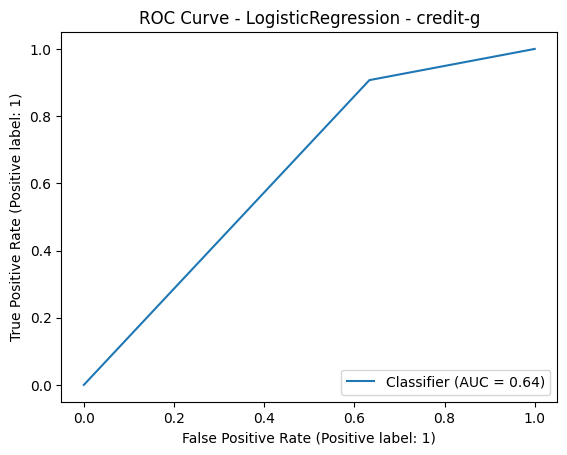

In [16]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
pred_y_test_creditg = random_search_creditg.predict(X_test_creditg)
y_test_creditg_numeric = y_test_creditg['class'].map({'good': 1, 'bad': 0})
pred_y_test_creditg = pd.Series(pred_y_test_creditg)
pred_y_test_creditg = pred_y_test_creditg.map({'good': 1, 'bad': 0})
RocCurveDisplay.from_predictions(y_test_creditg_numeric, pred_y_test_creditg)
plt.title('ROC Curve - LogisticRegression - credit-g')

In [17]:
import numpy as np
scores_creditg = random_search_creditg.cv_results_["mean_test_score"]
best_score_index_creditg = np.where(scores_creditg == random_search_creditg.best_score_)
number_of_iterations_creditg = best_score_index_creditg[0]
print(number_of_iterations_creditg)

[ 9 19 30]


In [18]:
random_search_diabetes.fit(X_train_diabetes, y_train_diabetes)
random_search_diabetes.cv_results_
print("Best Score of train set: "+str(random_search_diabetes.best_score_))
print("Best parameter set: "+str(random_search_diabetes.best_params_))
print("Test Score: "+str(random_search_diabetes.score(X_test_diabetes,y_test_diabetes)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score of train set: 0.7687058509929361
Best parameter set: {'model__solver': 'sag', 'model__multi_class': 'auto', 'model__max_iter': 50, 'model__fit_intercept': True, 'model__C': 100}
Test Score: 0.7857142857142857


Text(0.5, 1.0, 'ROC Curve - LogisticRegression - diabetes')

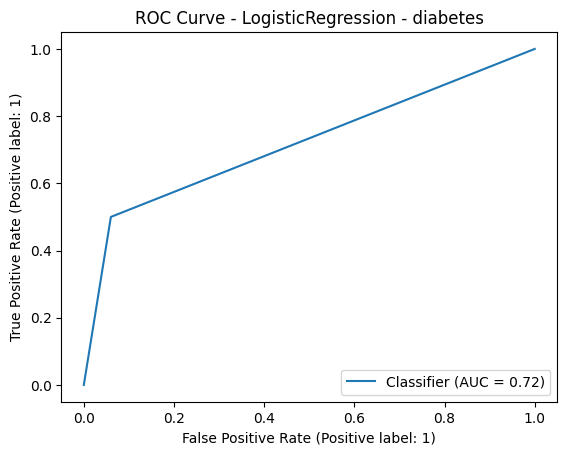

In [19]:
pred_y_test_diabetes = random_search_diabetes.predict(X_test_diabetes)
y_test_diabetes_numeric = y_test_diabetes['class'].map({'tested_negative': 0, 'tested_positive': 1})
pred_y_test_diabetes = pd.Series(pred_y_test_diabetes)
pred_y_test_diabetes = pred_y_test_diabetes.map({'tested_negative': 0, 'tested_positive': 1})
RocCurveDisplay.from_predictions(y_test_diabetes_numeric, pred_y_test_diabetes)
plt.title('ROC Curve - LogisticRegression - diabetes')

In [20]:
import numpy as np
scores_diabetes = random_search_diabetes.cv_results_["mean_test_score"]
best_score_index_diabetes = np.where(scores_diabetes == random_search_diabetes.best_score_)
number_of_iterations_diabetes = best_score_index_diabetes[0]
print(number_of_iterations_diabetes)

[ 1  2  8 17]


In [21]:
random_search_steel.fit(X_train_steel, y_train_steel)
random_search_steel.cv_results_
print("Best Score of train set: "+str(random_search_steel.best_score_))
print("Best parameter set: "+str(random_search_steel.best_params_))
print("Test Score: "+str(random_search_steel.score(X_test_steel,y_test_steel)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Score of train set: 1.0
Best parameter set: {'model__solver': 'sag', 'model__multi_class': 'auto', 'model__max_iter': 50, 'model__fit_intercept': True, 'model__C': 100}
Test Score: 1.0


Text(0.5, 1.0, 'ROC Curve - LogisticRegression - steel-plates-fault')

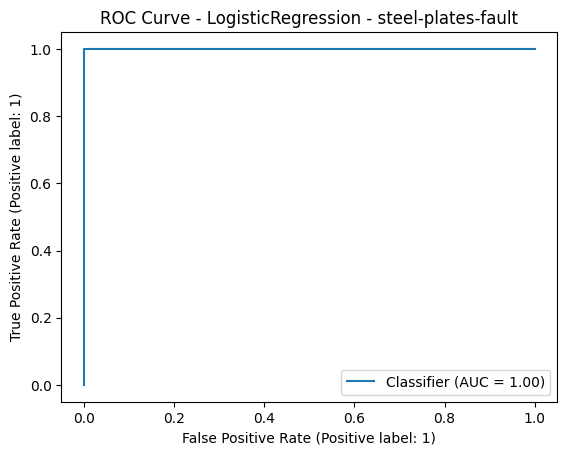

In [22]:
pred_y_test_steel = random_search_steel.predict(X_test_steel)
y_test_steel_numeric = y_test_steel['Class'].map({'1': 0, '2': 1})
pred_y_test_steel = pd.Series(pred_y_test_steel)
pred_y_test_steel = pred_y_test_steel.map({'1': 0, '2': 1})
RocCurveDisplay.from_predictions(y_test_steel_numeric, pred_y_test_steel)
plt.title('ROC Curve - LogisticRegression - steel-plates-fault')

In [23]:
score_steel = random_search_steel.cv_results_["mean_test_score"]
best_score_index_steel = np.where(score_steel == random_search_steel.best_score_)
number_of_iterations_steel = best_score_index_steel[0]
print(number_of_iterations_steel)

[ 1  2  5  6  8 15 17 18 21 26 29 33 34]


In [24]:
random_search_trans.fit(X_train_trans, y_train_trans)
random_search_trans.cv_results_
print("Best Score of train set: "+str(random_search_trans.best_score_))
print("Best parameter set: "+str(random_search_trans.best_params_))
print("Test Score: "+str(random_search_trans.score(X_test_trans,y_test_trans)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score of train set: 0.78593837535014
Best parameter set: {'model__solver': 'sag', 'model__multi_class': 'auto', 'model__max_iter': 75, 'model__fit_intercept': False, 'model__C': 100}
Test Score: 0.7733333333333333


Text(0.5, 1.0, 'ROC Curve - LogisticRegression - blood-transfusion-service-center')

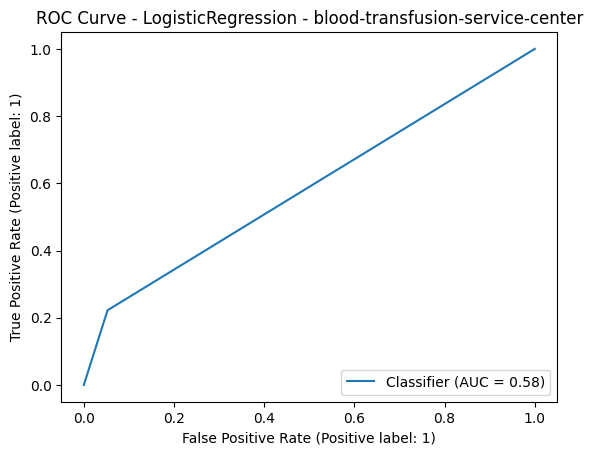

In [25]:
pred_y_test_trans = random_search_trans.predict(X_test_trans)
y_test_trans_numeric = y_test_trans['Class'].map({'1': 0, '2': 1})
pred_y_test_trans = pd.Series(pred_y_test_trans)
pred_y_test_trans = pred_y_test_trans.map({'1': 0, '2': 1})
RocCurveDisplay.from_predictions(y_test_trans_numeric, pred_y_test_trans)
plt.title('ROC Curve - LogisticRegression - blood-transfusion-service-center')

In [26]:
score_trans = random_search_trans.cv_results_["mean_test_score"]
best_score_index_trans = np.where(score_trans == random_search_trans.best_score_)
number_of_iterations_trans = best_score_index_trans[0]
print(number_of_iterations_trans)

[ 6 18 33]


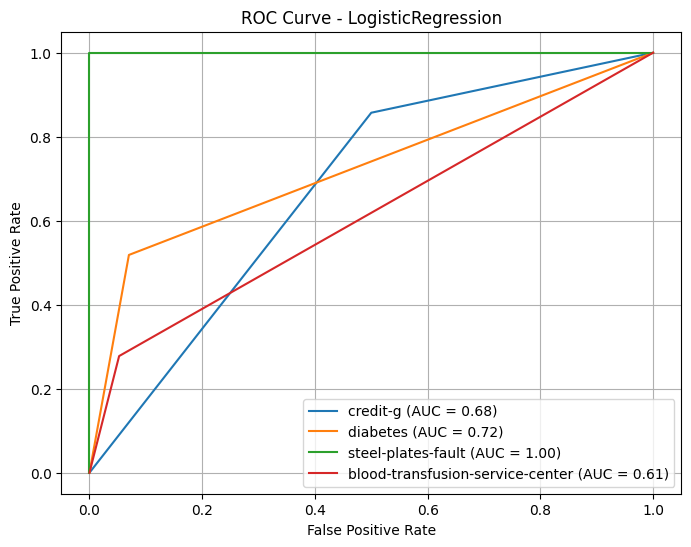

In [245]:
# summary ROC chart
from sklearn.metrics import roc_curve, auc

fpr1, tpr1, _ = roc_curve(y_test_creditg_numeric, pred_y_test_creditg)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_diabetes_numeric, pred_y_test_diabetes)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test_steel_numeric, pred_y_test_steel)
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, _ = roc_curve(y_test_trans_numeric, pred_y_test_trans)
roc_auc4 = auc(fpr4, tpr4)

# Plot ROC curves\n",
plt.figure(figsize=(8, 6))

plt.plot(fpr1, tpr1, label=f'credit-g (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'diabetes (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'steel-plates-fault (AUC = {roc_auc3:.2f})')
plt.plot(fpr4, tpr4, label=f'blood-transfusion-service-center (AUC = {roc_auc4:.2f})')

# Customize the plot\n",
plt.title('ROC Curve - LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

plt.show()

In [27]:
import numpy as np
params_arr = random_search_creditg.cv_results_["params"]
numbered_params_arr = list(range(len(params_arr)))
mean_test = []
for i in range(len(random_search_creditg.cv_results_["mean_test_score"])):
    mean_test.append(np.mean(
        [
            random_search_creditg.cv_results_["mean_test_score"][i],
            random_search_diabetes.cv_results_["mean_test_score"][i],
            random_search_steel.cv_results_["mean_test_score"][i],
            random_search_trans.cv_results_["mean_test_score"][i]
        ]
    ))
mean_test

scd = dict(zip(numbered_params_arr, mean_test))
scd
crb = -1
crbi = -1
for key, val in scd.items():
    if key > crb:
        crb = key
key, scd[key], params_arr[key], mean_test

(39,
 0.6918432689870089,
 {'model__solver': 'newton-cholesky',
  'model__multi_class': 'auto',
  'model__max_iter': 50,
  'model__fit_intercept': False,
  'model__C': 0.001},
 [0.8178244058051308,
  0.819379719050755,
  0.819379719050755,
  0.8184494058051307,
  0.6918432689870089,
  0.8191780469184876,
  0.7962708043533286,
  0.6918432689870089,
  0.819379719050755,
  0.7990991577838602,
  0.6963542118352612,
  0.6918432689870089,
  0.8184494058051307,
  0.793689851293602,
  0.7884424204787823,
  0.8191780469184876,
  0.8124053650880843,
  0.819379719050755,
  0.7962708043533286,
  0.7990991577838602,
  0.6918432689870089,
  0.8191780469184876,
  0.6918432689870089,
  0.6918432689870089,
  0.8124053650880843,
  0.6918432689870089,
  0.7952188028850085,
  0.6963542118352612,
  0.793689851293602,
  0.7952188028850085,
  0.7990991577838602,
  0.6918432689870089,
  0.6999069747747904,
  0.7962708043533286,
  0.7952188028850085,
  0.6999069747747904,
  0.7884424204787823,
  0.691843268987

In [28]:
import ConfigSpace as CS
from sklearn.model_selection import cross_val_score
from smac.facade import HyperparameterOptimizationFacade, BlackBoxFacade
from smac.scenario import Scenario
import numpy as np
from sklearn.model_selection import GridSearchCV

In [29]:
cs = CS.ConfigurationSpace()
model__C = CS.CategoricalHyperparameter('model__C' , choices=[0.001, 0.01, 0.1, 1, 10, 100],)
model__solver = CS.CategoricalHyperparameter("model__solver", choices=['lbfgs', 'liblinear', 'newton-cg','newton-cholesky',
                                      'sag', 'saga'],)
model__multi_class = CS.CategoricalHyperparameter("model__multi_class", choices=['auto', 'ovr'])
model__fit_intercept = CS.CategoricalHyperparameter("model__fit_intercept", choices = [True, False],)
model__max_iter = CS.CategoricalHyperparameter("model__max_iter", choices=[50, 75, 100, 125, 150, 200]) #choice None not supported
cs.add_hyperparameters(
        [
            model__C,
            model__solver,
            model__multi_class,
            model__fit_intercept,
            model__max_iter,
        ]
    )

[model__C, Type: Categorical, Choices: {0.001, 0.01, 0.1, 1, 10, 100}, Default: 0.001,
 model__solver, Type: Categorical, Choices: {lbfgs, liblinear, newton-cg, newton-cholesky, sag, saga}, Default: lbfgs,
 model__multi_class, Type: Categorical, Choices: {auto, ovr}, Default: auto,
 model__fit_intercept, Type: Categorical, Choices: {True, False}, Default: True,
 model__max_iter, Type: Categorical, Choices: {50, 75, 100, 125, 150, 200}, Default: 50]

In [30]:
def objective_function_creditg(config, seed: int = 0):
    config = {k: config[k] for k in config if config[k]}
    clf_pipeline_creditg.set_params(**config)
    scores = cross_val_score(clf_pipeline_creditg, X=X_train_creditg, y=y_train_creditg, cv=5) # X and y are your data
    return 1 - np.mean(scores)  # Minimize this value

def objective_function_diabetes(config, seed: int = 0):
    config = {k: config[k] for k in config if config[k]}
    clf_pipeline_diabetes.set_params(**config)
    scores = cross_val_score(clf_pipeline_diabetes, X=X_train_diabetes, y=y_train_diabetes, cv=5) # X and y are your data
    return 1 - np.mean(scores)  # Minimize this value

def objective_function_steel(config, seed: int = 0):
    config = {k: config[k] for k in config if config[k]}
    clf_pipeline_steel.set_params(**config)
    scores = cross_val_score(clf_pipeline_steel, X=X_train_steel, y=y_train_steel, cv=5) # X and y are your data
    return 1 - np.mean(scores)  # Minimize this value

def objective_function_trans(config, seed: int = 0):
    config = {k: config[k] for k in config if config[k]}
    clf_pipeline_trans.set_params(**config)
    scores = cross_val_score(clf_pipeline_trans, X=X_train_trans, y=y_train_trans, cv=5) # X and y are your data
    return 1 - np.mean(scores)  # Minimize this value

In [31]:
scenario = Scenario(
    configspace=cs,
    seed=0,
    deterministic=True,
)
model = HyperparameterOptimizationFacade.get_model(scenario=scenario)
init_des = HyperparameterOptimizationFacade.get_initial_design(scenario=scenario)

In [32]:
smac = HyperparameterOptimizationFacade(scenario=scenario, target_function=objective_function_creditg, model=model, overwrite=True)
best_config = smac.optimize()

best_config
default_cost = smac.validate(cs)


incumbent_cost = smac.validate(best_config)

best_config, f"Incumbent cost: {incumbent_cost}", f"Default cost: {default_cost}"

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 50 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][abstract_intensifier.py:515] Added config da993d as new incumbent because there are no incumbents yet.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][abstract_intensifier.py:590] Added config 4e41b8 and rejected config da993d as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[INFO][abstract_intensifier.py:590] Added config 47e4ac and rejected config 4e41b8 as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][abstract_intensifier.py:590] Added config 625cb1 and rejected config 47e4ac as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][abstract_intensifier.py:590] Added config 20cb93 and rejected config 625cb1 as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][smbo.py:319] Finished 50 trials.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][smbo.py:319] Finished 100 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

(Configuration(values={
   'model__C': 0.1,
   'model__fit_intercept': True,
   'model__max_iter': 100,
   'model__multi_class': 'auto',
   'model__solver': 'saga',
 }),
 'Incumbent cost: 0.24499999999999988',
 'Default cost: inf')

In [33]:
num_iterations_creditg = smac.runhistory
smac.runhistory.__len__()

100

In [34]:
config = {
   'C': 1,
   'fit_intercept': True,
   'max_iter': 50,
   'multi_class': 'auto',
   'solver': 'newton-cg',
 }
clf_pipeline_creditg = Pipeline(steps=[
    ('col_trans', col_trans_creditg),
    ('model', LogisticRegression(**config))
])
clf_pipeline_creditg.fit(X=X_test_creditg, y=y_test_creditg)

print("Test Score: "+str(clf_pipeline_creditg.score(X_test_creditg,y_test_creditg)))

Test Score: 0.825


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# number of iterations - trans
cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
for dct in cfd:
    for key in dct:
        dct[key] = [dct[key]]

gsp_creditg = GridSearchCV(
    estimator=clf_pipeline_creditg,
    param_grid=cfd,
)
gsp_creditg.fit(X_train_creditg, y_train_creditg)
print("Best Score of train set: "+str(gsp_creditg.best_score_))

C:\Users\Mieszko\AppData\Local\Temp\ipykernel_7564\1902329016.py:2: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

Best Score of train set: 0.7550000000000001


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
smac = HyperparameterOptimizationFacade(scenario=scenario, target_function=objective_function_diabetes, model=model, overwrite=True)
best_config = smac.optimize()
best_config
default_cost = smac.validate(cs)

incumbent_cost = smac.validate(best_config)

best_config, f"Incumbent cost: {incumbent_cost}", f"Default cost: {default_cost}"

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 50 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][abstract_intensifier.py:515] Added config da993d as new incumbent because there are no incumbents yet.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][abstract_intensifier.py:590] Added config 4e41b8 and rejected config da993d as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][smbo.py:319] Finished 50 trials.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][smbo.py:319] Finished 100 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

(Configuration(values={
   'model__C': 100,
   'model__fit_intercept': True,
   'model__max_iter': 200,
   'model__multi_class': 'ovr',
   'model__solver': 'lbfgs',
 }),
 'Incumbent cost: 0.2312941490070639',
 'Default cost: inf')

In [37]:
num_iterations_diabetes = smac.runhistory
sum = 0
for x in num_iterations_diabetes.get_configs():
    sum = sum + num_iterations_diabetes.get_trials(x).__len__()
sum

100

In [38]:
config = {
   'C': 10,
   'fit_intercept': False,
   'max_iter': 150,
   'multi_class': 'ovr',
   'solver': 'liblinear',
 }
clf_pipeline_diabetes = Pipeline(steps=[
    ('col_trans', col_trans_diabetes),
    ('model', LogisticRegression(**config))
])
clf_pipeline_diabetes.fit(X=X_train_diabetes, y=y_train_diabetes)

print("Test Score: "+str(clf_pipeline_diabetes.score(X_test_diabetes,y_test_diabetes)))

Test Score: 0.6363636363636364


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
for dct in cfd:
    for key in dct:
        dct[key] = [dct[key]]

gsp_diabetes = GridSearchCV(
    estimator=clf_pipeline_diabetes,
    param_grid=cfd,
)
gsp_diabetes.fit(X_train_diabetes, y_train_diabetes)
print("Best Score of train set: "+str(gsp_diabetes.best_score_))


C:\Users\Mieszko\AppData\Local\Temp\ipykernel_7564\2751828384.py:2: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

Best Score of train set: 0.7703318672530988


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
smac = HyperparameterOptimizationFacade(scenario=scenario, target_function=objective_function_steel, model=model, overwrite=True)
best_config = smac.optimize()
best_config
default_cost = smac.validate(cs)

# Let's calculate the cost of the incumbent
incumbent_cost = smac.validate(best_config)

best_config, f"Incumbent cost: {incumbent_cost}", f"Default cost: {default_cost}"

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 50 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][abstract_intensifier.py:515] Added config da993d as new incumbent because there are no incumbents yet.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][abstract_intensifier.py:590] Added config 4e41b8 and rejected config da993d as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][smbo.py:319] Finished 50 trials.


d:\aml\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[INFO][smbo.py:319] Finished 100 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

(Configuration(values={
   'model__C': 100,
   'model__fit_intercept': True,
   'model__max_iter': 200,
   'model__multi_class': 'ovr',
   'model__solver': 'lbfgs',
 }),
 'Incumbent cost: 0.0',
 'Default cost: inf')

In [41]:
num_iterations_steel = smac.runhistory
sum = 0
for x in num_iterations_steel.get_configs():
    sum = sum + num_iterations_steel.get_trials(x).__len__()
sum

100

In [42]:
config = {
   'C': 100,
   'fit_intercept': True,
   'max_iter': 200,
   'multi_class': 'ovr',
   'solver': 'lbfgs',
 }
clf_pipeline_steel = Pipeline(steps=[
    ('col_trans', col_trans_steel),
    ('model', LogisticRegression(**config))
])
clf_pipeline_steel.fit(X=X_train_steel, y=y_train_steel)

print("Test Score: "+str(clf_pipeline_steel.score(X_test_steel,y_test_steel)))

d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Score: 1.0


In [43]:
cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
for dct in cfd:
    for key in dct:
        dct[key] = [dct[key]]

gsp_steel = GridSearchCV(
    estimator=clf_pipeline_steel,
    param_grid=cfd,
)
gsp_steel.fit(X_train_steel, y_train_steel)
print("Best Score of train set: "+str(gsp_steel.best_score_))


C:\Users\Mieszko\AppData\Local\Temp\ipykernel_7564\664847083.py:2: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Best Score of train set: 1.0


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
smac = HyperparameterOptimizationFacade(scenario=scenario, target_function=objective_function_trans, overwrite=True)
best_config = smac.optimize()
best_config
default_cost = smac.validate(cs)

incumbent_cost = smac.validate(best_config)

best_config, f"Incumbent cost: {incumbent_cost}", f"Default cost: {default_cost}"

[INFO][abstract_initial_design.py:95] Reducing the number of initial configurations from 50 to 25 (max_ratio == 0.25).
[INFO][abstract_initial_design.py:147] Using 25 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][abstract_intensifier.py:515] Added config da993d as new incumbent because there are no incumbents yet.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][abstract_intensifier.py:590] Added config 4e41b8 and rejected config da993d as incumbent because it is not better than the incumbents on 1 instances:


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][smbo.py:319] Finished 50 trials.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[INFO][smbo.py:319] Finished 100 trials.
[INFO][smbo.py:327] Configuration budget is exhausted:
[INFO][smbo.py:328] --- Remaining wallclock time: inf
[INFO][smbo.py:329] --- Remaining cpu time: inf
[INFO][smbo.py:330] --- Remaining trials: 0
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

(Configuration(values={
   'model__C': 100,
   'model__fit_intercept': True,
   'model__max_iter': 200,
   'model__multi_class': 'ovr',
   'model__solver': 'lbfgs',
 }),
 'Incumbent cost: 0.2274369747899161',
 'Default cost: inf')

In [45]:
config = {
   'C': 100,
   'fit_intercept': True,
   'max_iter': 200,
   'multi_class': 'ovr',
   'solver': 'lbfgs',
 }
clf_pipeline_trans = Pipeline(steps=[
    ('col_trans', col_trans_trans),
    ('model', LogisticRegression(**config))
])
clf_pipeline_trans.fit(X=X_train_trans, y=y_train_trans)

print("Test Score: "+str(clf_pipeline_trans.score(X_test_trans,y_test_trans)))

Test Score: 0.7666666666666667


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
for dct in cfd:
    for key in dct:
        dct[key] = [dct[key]]

gsp_trans = GridSearchCV(
    estimator=clf_pipeline_trans,
    param_grid=cfd,
)
gsp_trans.fit(X_train_trans, y_train_trans)
print("Best Score of train set: "+str(gsp_trans.best_score_))


C:\Users\Mieszko\AppData\Local\Temp\ipykernel_7564\1965773644.py:2: DeprecationWarning: `Configuration` act's like a dictionary. Please use `dict(config)` instead of `get_dictionary` if you explicitly need a `dict`
  cfd = [x.get_dictionary() for x in smac.runhistory.get_configs()]
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

Best Score of train set: 0.78593837535014


d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\aml\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

In [47]:
import numpy as np
params_arr = gsp_creditg.cv_results_["params"]
numbered_params_arr = list(range(len(params_arr)))
mean_test = []
for i in range(len(gsp_creditg.cv_results_["mean_test_score"])):
    mean_test.append(np.mean(
        [
            gsp_creditg.cv_results_["mean_test_score"][i],
            gsp_diabetes.cv_results_["mean_test_score"][i],
            gsp_steel.cv_results_["mean_test_score"][i],
            gsp_trans.cv_results_["mean_test_score"][i]
        ]
    ))

mean_test

scd = dict(zip(numbered_params_arr, mean_test))
scd
crb = -1
crbi = -1
for key, val in scd.items():
    if key > crb:
        crb = key
key, scd[key], params_arr[key], mean_test

(99,
 0.7951144668183145,
 {'model__C': 0.1,
  'model__fit_intercept': False,
  'model__max_iter': 100,
  'model__multi_class': 'ovr',
  'model__solver': 'newton-cg'},
 [0.6999069747747904,
  0.819379719050755,
  0.793689851293602,
  0.6918432689870089,
  0.6999069747747904,
  0.8184494058051307,
  0.7952188028850085,
  0.7990991577838602,
  0.7884424204787823,
  0.8191780469184876,
  0.793689851293602,
  0.6918432689870089,
  0.6918432689870089,
  0.8191780469184876,
  0.7962708043533286,
  0.7925274531323876,
  0.6999069747747904,
  0.819379719050755,
  0.7952188028850085,
  0.6918432689870089,
  0.6918432689870089,
  0.8124053650880843,
  0.7952188028850085,
  0.7990991577838602,
  0.7884424204787823,
  0.824067219050755,
  0.824911056585769,
  0.7984583043533287,
  0.821567219050755,
  0.824067219050755,
  0.8009583043533287,
  0.8274110565857691,
  0.7935519668183146,
  0.7924566778962943,
  0.7962066778962943,
  0.7937066778962942,
  0.8226594301287347,
  0.8226594301287347,
  0.